# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/retail_dataset.csv')

Mounted at /content/gdrive


In [4]:
#look at the top rows
df.head() 

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June


In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [6]:
#describe the data before cleaning it
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


In [7]:
df_clean = df

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [29]:
df_clean.count().notnull()

customer_id         True
customer_name       True
address_line_1      True
city                True
state_province      True
postal_code         True
order_id            True
order_date          True
customer_id.1       True
order_id.1          True
product_id          True
quantity            True
product_id.1        True
product_name        True
product_price       True
total_amount        True
order_year_month    True
order_month         True
dtype: bool

In [28]:
#Plot the total number of orders and revenue by state

<AxesSubplot:xlabel='state_province'>

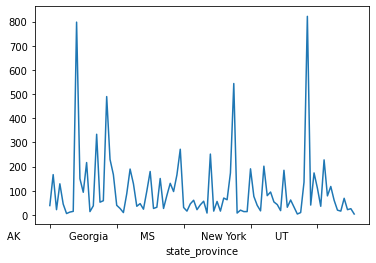

In [35]:
df_clean.groupby('state_province')['order_id'].count().plot()

<AxesSubplot:xlabel='state_province'>

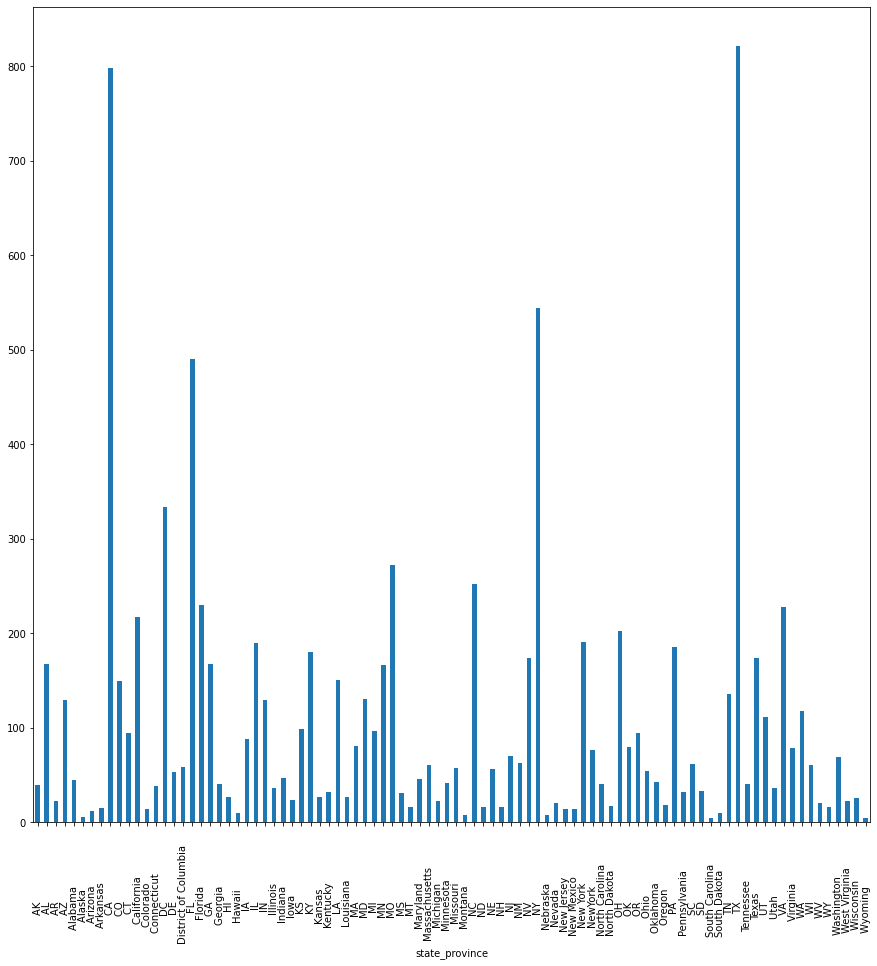

In [74]:
id_count_per_state = df_clean.groupby('state_province')['order_id'].count()

id_count_per_state.plot(kind = 'bar', figsize = (15,15))

In [68]:
df_clean['total_amount'] = df_clean['total_amount'].str.replace('$', '', regex = True)
df_clean['total_amount'] = df_clean['total_amount'].str.replace(',', '', regex = True)

In [69]:
df_clean['total_amount'].astype('float64')

0         5.97
1       171.96
2        19.95
3        15.92
4        27.93
         ...  
9564    249.44
9565    749.99
9566    329.99
9567     31.18
9568     77.95
Name: total_amount, Length: 9569, dtype: float64